In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
def lorenz(state, sigma, rho, beta):
    x, y, z = state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x*y - beta*z
    return np.array([dx_dt, dy_dt, dz_dt])

In [3]:
def euler(f,state, dt):
    x, y, z = state
    f_x, f_y, f_z = f(state)

    x += dt * f_x
    y += dt * f_y
    z += dt * f_z

    return np.array([x, y, z])

In [4]:
#initial conditions
x0, y0, z0 = 0.,1.,0.8
initial_state = [x0, y0, z0]
sigma, rho, beta = 10, 28, 8/3
lorenz_sys = lambda state:lorenz(state,sigma,rho,beta)
t, dt = 0, 0.01
#integration loop
sol = []

for i in range(10000):
    sol.append(euler(lorenz_sys,initial_state, dt))
    initial_state = sol[-1]
    t += dt
sol = np.array(sol)

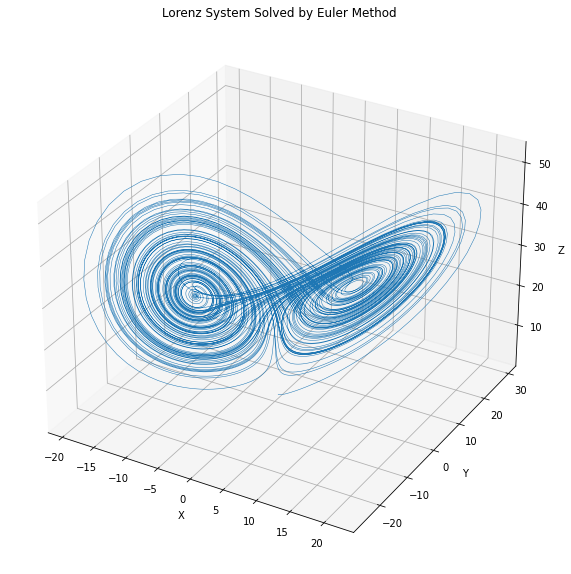

In [5]:
#plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=0.5)
ax.set_title("Lorenz System Solved by Euler Method")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()


In [6]:
def runge_kutta(f,state, dt):
    x, y, z = state
    f1_x, f1_y, f1_z = f(state)

    f2_x, f2_y, f2_z = f([x + 0.5*dt * f1_x, y + 0.5*dt * f1_y, z + 0.5*dt * f1_z])

    f3_x, f3_y, f3_z = f([x + 0.5*dt * f2_x, y + 0.5*dt * f2_y, z + 0.5*dt * f2_z])

    f4_x, f4_y, f4_z = f([x + dt * f3_x, y + dt * f3_y, z + dt * f3_z])

    x += (dt * f1_x + 2*dt * f2_x + 2*dt * f3_x + dt * f4_x) / 6.0
    y += (dt * f1_y + 2*dt * f2_y + 2*dt * f3_y + dt * f4_y) / 6.0
    z += (dt * f1_z + 2*dt * f2_z + 2*dt * f3_z + dt * f4_z) / 6.0

    return np.array([x, y, z])

In [11]:
#initial conditions
x0, y0, z0 = 1, 1, 1
initial_state = [x0, y0, z0]
sigma, rho, beta = 10, 28, 8/3
lorenz_sys = lambda state:lorenz(state,sigma,rho,beta)
t, dt = 0, 0.01
#integration loop
sol = []

for i in range(10000):
    sol.append(runge_kutta(lorenz_sys,initial_state, dt))
    initial_state = sol[-1]
    t += dt
sol = np.array(sol)

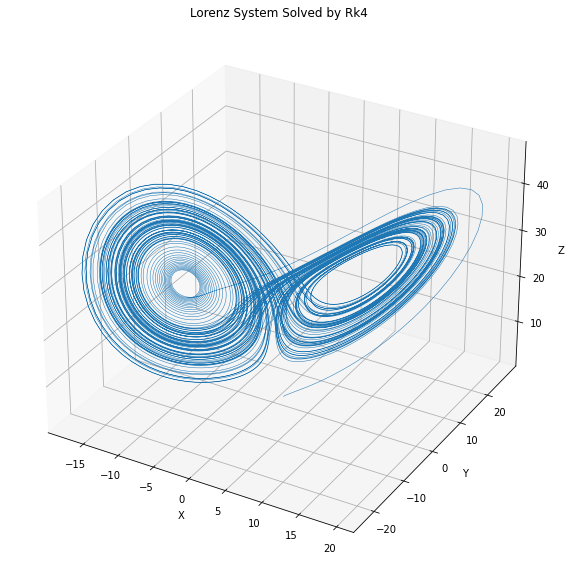

In [12]:
#plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=0.5)
ax.set_title("Lorenz System Solved by Rk4")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [20]:
def runge_kutta_adaptive( f, t0, state, t_end, tol):
    x, y, z = state
    #integration loop
    sol = [state]
    t = t0

    h = 0.01  # initial step size
    while t < t_end:
        y1 = runge_kutta(f,[x, y, z], h)
        y2 = runge_kutta(f,[x, y, z], h)
        error = max(abs(y2[i] - y1[i]) for i in range(len(y1)))
        if error < tol:
            sol.append([y2[0],y2[1],y2[2]])
            x, y, z = sol[-1]
            t += h
        if error != 0:
            h = min(h * (tol / error) ** 0.2, t_end - t)
    return np.array(sol) ,

In [21]:
#initial conditions
x0, y0, z0 = 1, 1, 1
initial_state = [x0, y0, z0]
sigma, rho, beta = 10, 28, 8/3
lorenz_sys = lambda state:lorenz(state,sigma,rho,beta)
# Conditions initiales
t0 = 0.0

# Temps final
t_end = 60.0

# Tolérance d'erreur
tol = 1e-6
solt = runge_kutta_adaptive(lorenz_sys,t0, initial_state, t_end, tol)

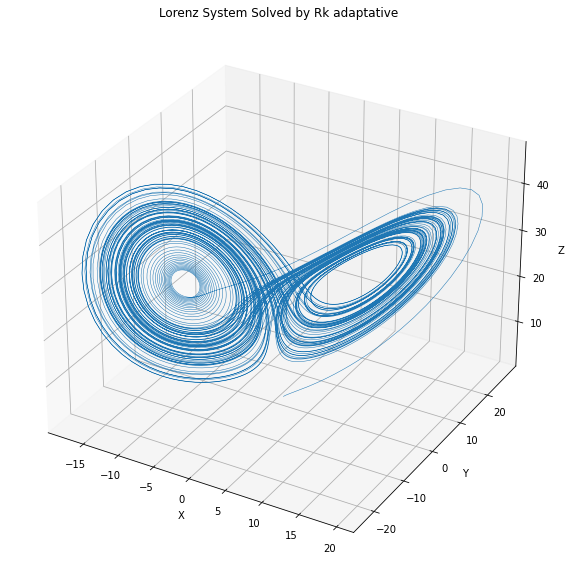

In [22]:
#plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=0.5)
ax.set_title("Lorenz System Solved by Rk adaptative")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

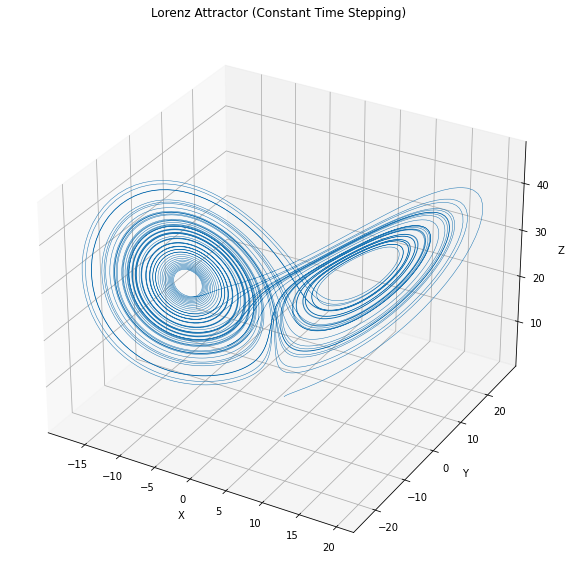

(10000, 3)


In [23]:
# odeint(func, y0, t, args=()), func(y, t, ...)
# Define the Lorenz ODE system
def lorenz_odeint(state, t, sigma, rho, beta):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz

# Initial conditions
x0, y0, z0 = 1.0, 1.0, 1.0
initial_state = [x0, y0, z0]

# Model parameters
sigma = 10.0
rho = 28.0
beta = 8/3

# Solve the Lorenz ODE system with constant time stepping
t_span = (0, 60)
t_eval = np.linspace(t_span[0], t_span[1], 10000)
sol = odeint(lorenz_odeint, initial_state, t_eval, args=(sigma, rho, beta))

# Plot the Lorenz attractor in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:, 0], sol[:, 1], sol[:, 2], lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor (Constant Time Stepping)')
plt.show()
print(sol.shape)

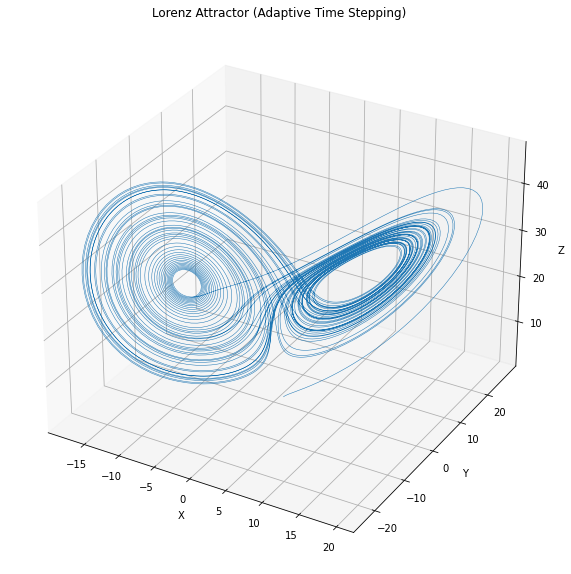

(3, 5951)


In [24]:
def lorenz_solve_ivp(t, state, sigma, rho, beta):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return dx, dy, dz
# Initial conditions
x0, y0, z0 = 1.0, 1.0, 1.0
initial_state = [x0, y0, z0]

# Model parameters
sigma = 10.0
rho = 28.0
beta = 8/3

# Solve the Lorenz ODE system with adaptive time stepping
t_span = (0, 60)
sol = solve_ivp(lorenz_solve_ivp, t_span, initial_state, args=(sigma, rho, beta), rtol=1e-8, atol=1e-8)

# Plot the Lorenz attractor in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor (Adaptive Time Stepping)')
plt.show()
print(sol.y.shape)

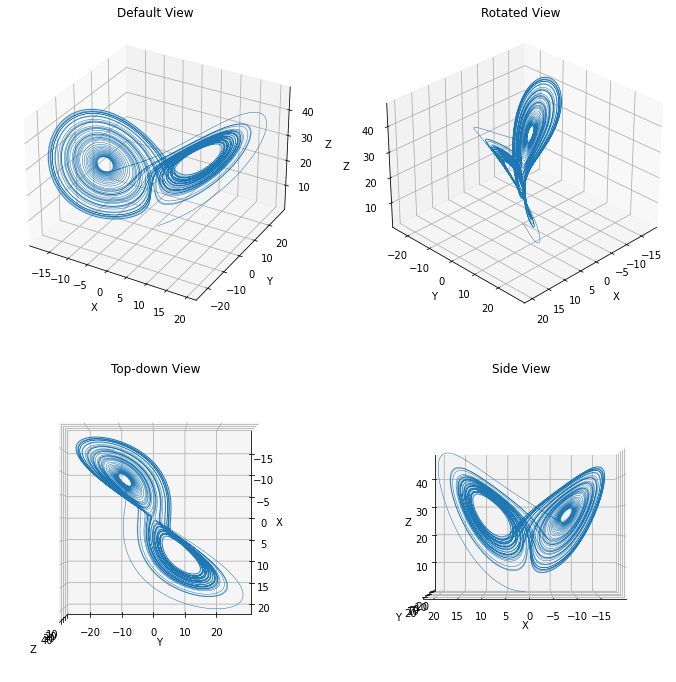

In [25]:
# Plot the Lorenz attractor in 3D from different angles
fig = plt.figure(figsize=(12, 12))

# Plot 1: Default view
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax1.set_title('Default View')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot 2: Rotated view
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax2.view_init(elev=30, azim=45)
ax2.set_title('Rotated View')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Plot 3: Top-down view
ax3 = fig.add_subplot(223, projection='3d')
ax3.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax3.view_init(elev=90, azim=0)
ax3.set_title('Top-down View')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

# Plot 4: Side view
ax4 = fig.add_subplot(224, projection='3d')
ax4.plot(sol.y[0], sol.y[1], sol.y[2], lw=0.5)
ax4.view_init(elev=0, azim=90)
ax4.set_title('Side View')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

plt.show()

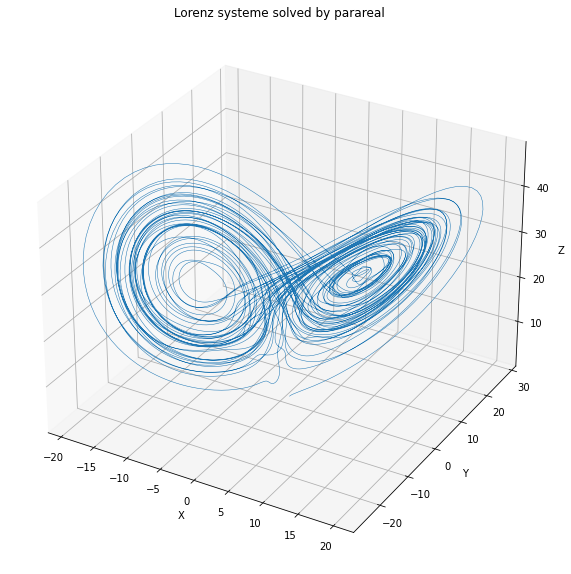

In [67]:
def parareal(f,coarse_func,fine_func, initial_state, t_0,t_end,N,K, max_iterations=5, tolerance=1e-2):

    dt = (t_end-t_0)/N
    dk = dt/K
    
    coarse_solution = [initial_state]

    for i in range(1,N):
        coarse_solution.append(coarse_func(f, coarse_solution[i-1], dt))
        
    coarse_solution = np.array(coarse_solution)
    fine_solution=np.empty_like(coarse_solution)
    u = coarse_solution
    
    iteration = 0
    while iteration < max_iterations:
        u_prev = u.copy()
        coarse_solution_prev = coarse_solution.copy()
        
        fine_solution[0]=u[0]
        for i in range(1,N):
            temp = u[i-1]
            for j in range(K):
                temp = fine_func(f, temp, dk)
            fine_solution[i] = temp 
            
        
        coarse_solution[0]=u[0]
        
        for i in range(1,N): 
            coarse_solution[i] = coarse_func(f, u[i-1], dt)
            u[i] = coarse_solution[i] + fine_solution[i] - coarse_solution_prev[i]
            
        iteration += 1

        # Check the stopping criterion
        error = np.all(np.abs(u - u_prev) < tolerance)
        if error:
            break

    return u

# Set up time points and initial conditions
t_0=0
t_end=60
N=10000
x0, y0, z0 = 1.,1.,0.8
initial_state = [x0, y0, z0]
sigma, rho, beta = 10, 28, 8/3

lorenz_sys = lambda state:lorenz(state,sigma,rho,beta)
coarse_func = lambda f,state, dt:euler(f,state, dt)
fine_func = lambda f,state, dt:euler(f,state, dt)

# Solve the Lorenz system using Parareal algorithm
solution_parareal = parareal(lorenz_sys,coarse_func,fine_func, initial_state,t_0,t_end,N,10)

# Plotting
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution_parareal[:, 0], solution_parareal[:, 1], solution_parareal[:, 2], label='Parareal', lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz systeme solved by parareal')
plt.show()
